In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
 
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

In [27]:
train = pd.read_csv("/home/gtayx/keras/data/train.csv")
test = pd.read_csv("/home/gtayx/keras/data/test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

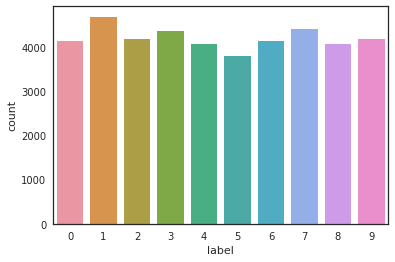

In [28]:
Y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)
g = sns.countplot(Y_train)
Y_train.value_counts()

In [30]:
X_train.isnull().any().describe()
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [31]:
X_train /=255.
test /= 255.

In [32]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [33]:
Y_train = to_categorical(Y_train, num_classes=10)

In [34]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train,
                                                 Y_train,
                                                 test_size=0.1,
                                                 random_state = random_seed)

In [71]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), padding='Same',
         activation = 'relu',
         input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size=(5,5), padding='Same',
         activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='Same',
                activation='relu'))
model.add(Conv2D(64, (3,3), padding='Same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 64)          0         
__________

In [73]:
optimizer = RMSprop(lr = 0.001, rho=0.9, epsilon=1e-08,
                   decay=0.0)

In [77]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
             metrics=['accuracy'])

In [78]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [102]:
epochs = 20
batch_size = 86

In [81]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=10,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False,
                            vertical_flip=False)
datagen.fit(X_train)

In [103]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/20
 - 42s - loss: 0.0671 - acc: 0.9810 - val_loss: 0.0315 - val_acc: 0.9924
Epoch 2/20
 - 40s - loss: 0.0697 - acc: 0.9808 - val_loss: 0.0241 - val_acc: 0.9917
Epoch 3/20
 - 40s - loss: 0.0707 - acc: 0.9804 - val_loss: 0.0215 - val_acc: 0.9938
Epoch 4/20
 - 40s - loss: 0.0728 - acc: 0.9806 - val_loss: 0.0348 - val_acc: 0.9926
Epoch 5/20
 - 40s - loss: 0.0711 - acc: 0.9813 - val_loss: 0.0193 - val_acc: 0.9952
Epoch 6/20
 - 40s - loss: 0.0760 - acc: 0.9794 - val_loss: 0.0297 - val_acc: 0.9938
Epoch 7/20
 - 40s - loss: 0.0751 - acc: 0.9799 - val_loss: 0.0284 - val_acc: 0.9926
Epoch 8/20
 - 40s - loss: 0.0772 - acc: 0.9798 - val_loss: 0.0289 - val_acc: 0.9917
Epoch 9/20

Epoch 00009: reducing learning rate to 0.0005000000237487257.
 - 40s - loss: 0.0777 - acc: 0.9802 - val_loss: 0.0352 - val_acc: 0.9910
Epoch 10/20
 - 40s - loss: 0.0570 - acc: 0.9849 - val_loss: 0.0234 - val_acc: 0.9926
Epoch 11/20
 - 40s - loss: 0.0577 - acc: 0.9847 - val_loss: 0.0199 - val_acc: 0.9936
Epoch 12/20

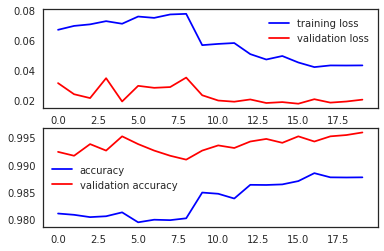

In [105]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color = 'b',
          label = 'training loss')
ax[0].plot(history.history['val_loss'], color = 'r',
          label = 'validation loss')
legend = ax[0].legend(loc='best', shadow = True)

ax[1].plot(history.history['acc'], color = 'b',
          label = 'accuracy')
ax[1].plot(history.history['val_acc'], color = 'r',
          label = 'validation accuracy')
legend = ax[1].legend(loc='best', shadow = True)

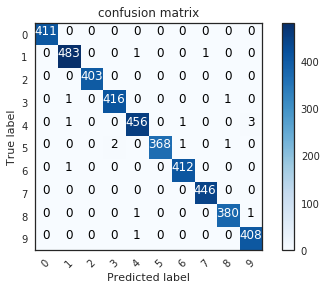

In [106]:
def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title = 'confusion matrix',
                         cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 


In [109]:
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name = 'Label')

In [110]:
submission = pd.concat([pd.Series(range(1, 28001), name='ImageId'), results],
                      axis = 1)
submission.to_csv('cnn_mnist_datagen.csv', index = False)